# Modeling a miRNA Regulatory Network using NetworkX

NetworkX is a Python language software package for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks. See https://networkx.github.io/ for more information.

In [1]:
import networkx as nx

## Build up a miRNA regulatory network from an edge list

We use a directed graph (nx.DiGraph instance) to model the miR-target network.

In [64]:
G = nx.read_edgelist("../hw4/hw4.tsv", delimiter="\t", create_using=nx.DiGraph())
G.remove_edge('miR Family', 'Gene Symbol')  # remove the header line

## Degrees

The requirements in hw4 can be easily achieved.

In [17]:
indeg = G.in_degree()
gene = sorted(indeg, key=indeg.get)[-1]
print gene, 'has largest indegree', indeg[gene]

TNRC6B has largest indegree 80


In [18]:
# Try it yourself. Give me the miRNA w/ largest out-degree here:

miR-124/124ab/506 has largest outdegree 1791


In [65]:
from itertools import combinations
miRs = [n for n in G if G.out_degree(n) > 0]
pair2size = {(a,b): len(set(G.neighbors(a)) & set(G.neighbors(b))) \
             for a,b in combinations(miRs, 2)}
pair, size = sorted(pair2size.items(), key=lambda i: i[1])[-1]
print pair
print size

(u'miR-182', u'miR-96/507/1271')
881


## Degree distribution

In [37]:
import pandas as pd
from pylab import *
%matplotlib inline

Build a node property dataframe using pandas:

In [38]:
df = pd.DataFrame({"in_degree": indeg})

Plot the in-degree distribution for genes (ignore miRs becasue their in-degrees are all zero)

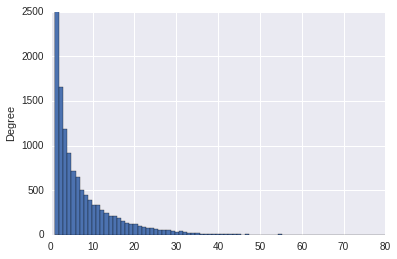

In [44]:
df[df["in_degree"] > 0]["in_degree"].plot(kind='hist', bins=80)

Now it's your turn. Show me the miR out-degree distribution.

## Draw the network for a specific miRNA family

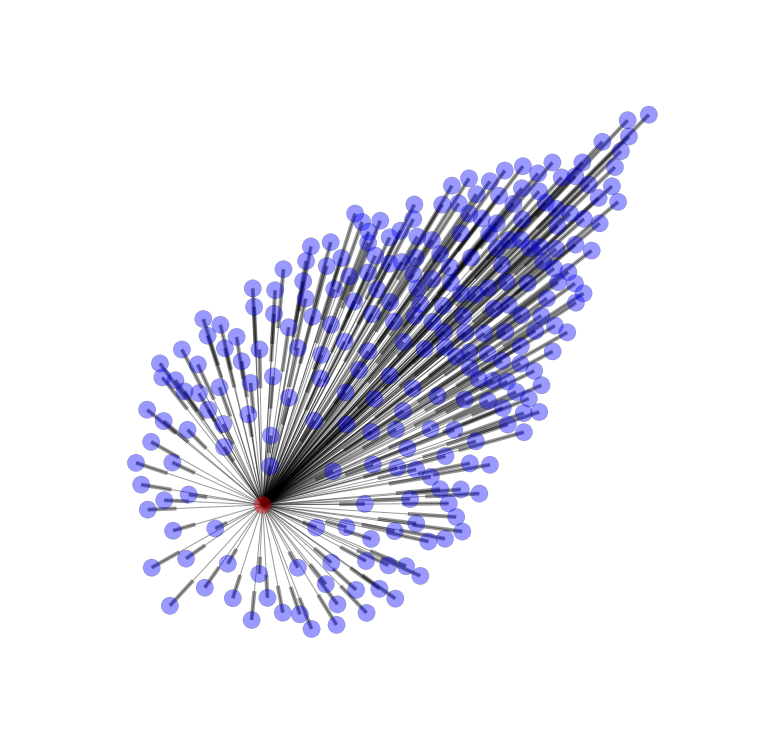

In [85]:
miR = 'miR-339b/339-5p/3586-5p'
targets = G.neighbors(miR)
g = G.subgraph([miR] + targets)
colors = ['r' if n == miR else 'b' for n in g.nodes()]
figure(figsize=(10,10))
nx.draw(g, node_color=colors, alpha=.4)

Wrap it into a function (e.g., `draw_network`) so that the user can draw a network by calling `draw_network('miR-339b/339-5p/3586-5p')`.

In [86]:
def draw_network(miR):
    # your turn
    pass
